In [1]:
#Data Processing
import numpy as np
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


#ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *


#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Miscellaneous
from tqdm import tqdm
import os
import random

In [2]:
train_dir = r'E:\newmini\Training'
test_dir = r'E:\newmini\Testing'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+"//" +label):
        train_paths.append(train_dir + '//'+label+ '//'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+ '//' + label):
        test_paths.append(test_dir +'//'+label + '//'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

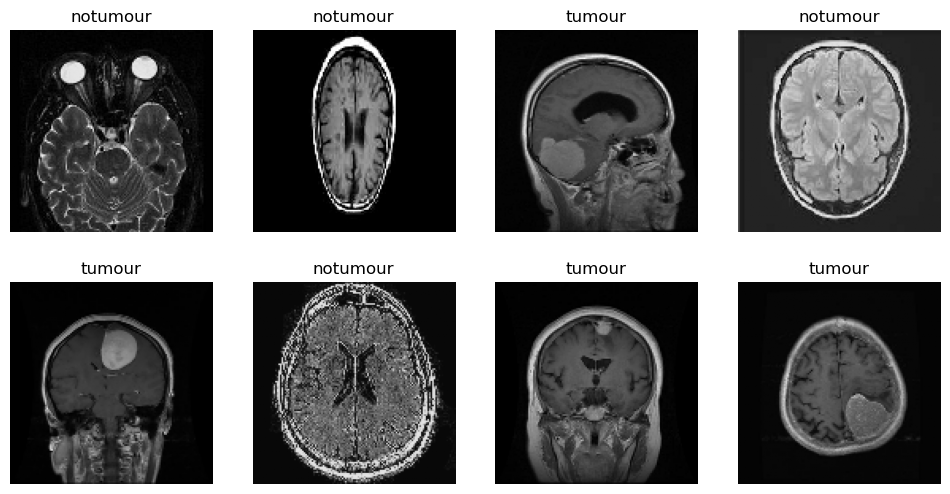

In [3]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Sharpness(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

IMAGE_SIZE = 128


def open_images(paths):

    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)


images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

In [4]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

In [5]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                     

In [6]:
model.fit(datagen(train_paths, train_labels, batch_size=30, epochs=11), steps_per_epoch=len(train_paths)//30, epochs=11)

Epoch 1/11


96/96 [==============================] - 58s 593ms/step - loss: 3.8380 - accuracy: 0.8687
Epoch 2/11
96/96 [==============================] - 30s 309ms/step - loss: 0.6326 - accuracy: 0.9095
Epoch 3/11
96/96 [==============================] - 28s 293ms/step - loss: 0.1203 - accuracy: 0.9619
Epoch 4/11
96/96 [==============================] - 27s 286ms/step - loss: 0.1405 - accuracy: 0.9651
Epoch 5/11
96/96 [==============================] - 28s 294ms/step - loss: 0.0830 - accuracy: 0.9878
Epoch 6/11
96/96 [==============================] - 29s 298ms/step - loss: 0.0200 - accuracy: 0.9923
Epoch 7/11
96/96 [==============================] - 31s 322ms/step - loss: 0.0287 - accuracy: 0.9902
Epoch 8/11
96/96 [==============================] - 32s 334ms/step - loss: 0.0986 - accuracy: 0.9881
Epoch 9/11
96/96 [==============================] - 28s 288ms/step - loss: 0.0138 - accuracy: 0.9962
Epoch 10/11
96/96 [==============================] - 29s 297ms/step - loss: 0.0118 - accu

In [7]:
train_loss, train_acc = model.evaluate(open_images(train_paths), encode_label(train_labels))
test_loss, test_acc = model.evaluate(open_images(test_paths), encode_label(test_labels))

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

10/10 [==============================] - 0s 39ms/step - loss: 0.0102 - accuracy: 0.9932
Train accuracy: 0.9937759041786194
Test accuracy: 0.9931507110595703


1/1 [==============================] - 0s 150ms/step


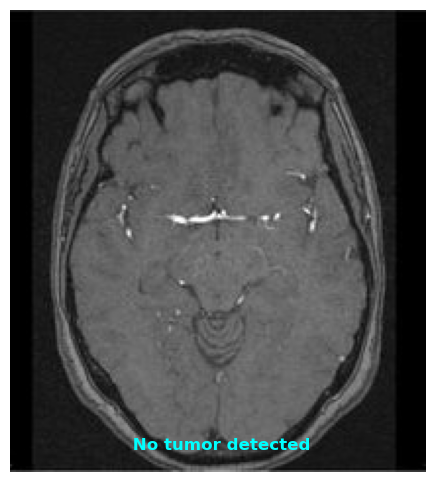

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and preprocess the image
path = r"E:\small\Training\notumor\Tr-no_0062.jpg"
my_image = load_img(path, target_size=(128, 128))
my_image = img_to_array(my_image)
my_image = my_image / 255
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))

# Make the prediction
prediction = model.predict(my_image)
predict_index = np.argmax(prediction)

if predict_index == 1:
    print("\033[1m\033[92m tumor detected\033[0m\033[0m")
    img = mpimg.imread(path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.text(
        img.shape[1] // 2, img.shape[0] - 10, "tumor detected",
        fontsize=12, color='lime', ha='center', va='bottom', weight='bold'
    )
    plt.show()
else:
    print("\033[1m\033[91m....Warning:No Tumor detected...\033[0m\033[0m")
    img = mpimg.imread(path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.text(
        img.shape[1] // 2, img.shape[0] - 10, " No tumor detected",
        fontsize=12, color='cyan', ha='center', va='bottom', weight='bold'
    )
    plt.show()